## Reading video and images

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

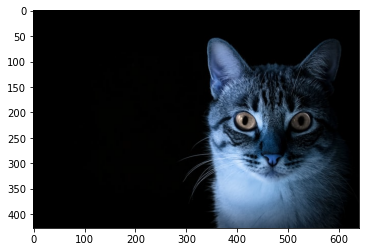

In [4]:
img=cv.imread('Resources/Photos/cat.jpg')
plt.imshow(img)

In [3]:
capture=cv.VideoCapture('Resources/Videos/dog.mp4')

In [4]:
while True:
    isTrue,frame=capture.read()
    cv.imshow('Video',frame)
    if cv.waitKey(20) & 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()
    

## Resizing and Rescaling  Frames

In [5]:
def rescaleFrame(frame, scale=0.75):
    #images,videos live videos
    width=int(frame.shape[1]*scale)#New width
    height=int(frame.shape[0]*scale)#New height
    dimensions=(width,height)#New dimensions
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)#Opencv resize method

In [6]:
capture=cv.VideoCapture('Resources/Videos/dog.mp4')
while True:
    isTrue,frame=capture.read()
    frame_resized=rescaleFrame(frame)
    cv.imshow('Video Resized',frame_resized)
    cv.imshow('Video',frame)
    if cv.waitKey(20) & 0xff==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

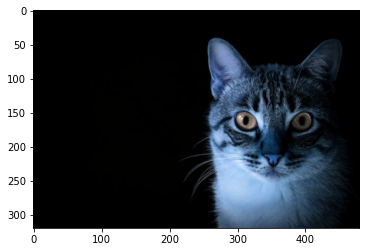

In [11]:
resized_image=rescaleFrame(img)
plt.imshow(resized_image);

In [8]:
#live video
def changeResolution(width,height):
    capture.set(3,width)
    capture.set(4,height)

## Draw On Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

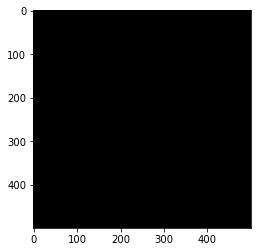

In [18]:
blank=np.zeros((500,500,3),dtype='uint8')
plt.imshow(blank)
#uint8 is a data type indicates images

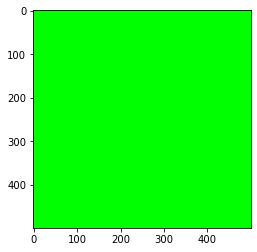

In [19]:
#Paint the image certain colour
blank[:]=0,255,0
plt.imshow(blank)

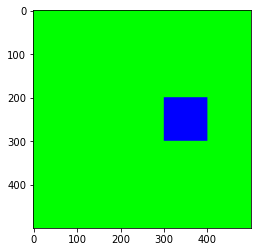

In [20]:
blank[200:300 , 300:400]=0,0,255
plt.imshow(blank)

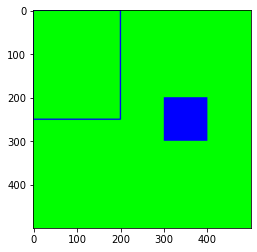

In [21]:
#2.Draw a rectangle
cv.rectangle(blank,(0,0),(200,250),(0,0,250),thickness=2)
plt.imshow(blank)

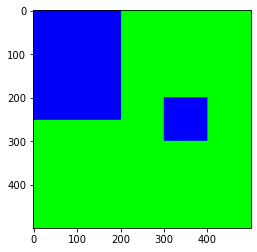

In [22]:
cv.rectangle(blank,(0,0),(200,250),(0,0,250),thickness=cv.FILLED)
plt.imshow(blank)

In [ ]:
#Draw A Circle